## T. Martz-Oberlander, 2015-11-12, CO2 and Speed of Sound
### Formatting PITCH pipe organ data for Python operations



The entire script looks for mathematical relationships between CO2 concentration changes and pitch changes from a pipe organ. This script uploads, cleans data and organizes new dataframes, creates figures, and performs statistical tests on the relationships between variable CO2 and frequency of sound from a note played on a pipe organ.

This uploader script:

1) Uploads organ note pitch data files

2) Munges it (creates a Date Time column for the time stamps), establishes column contents as floats

3) Outputs a new dataframe with mean pitch values, grouped by area of the chapel for comparison with same-location environmental data.

Here I pursue data analysis route 1 (as mentionted in my notebook.md file), which involves comparing one pitch dataframe with one dataframe of environmental characteristics taken at one sensor location. Both dataframes are compared by the time of data recorded.





In [2]:
# I import useful libraries (with functions) so I can visualize my data
# I use Pandas because this dataset has word/string column titles and I like the readability features of commands and finish visual products that Pandas offers

import pandas as pd
import matplotlib.pyplot as plt
import re
import numpy as np

%matplotlib inline

#I want to be able to easily scroll through this notebook so I limit the length of the appearance of my dataframes 
from pandas import set_option
set_option('display.max_rows', 10)


##Uploaded data into Python¶


First I upload my data sets. I am working with two: one for pitch measurements and another for environmental characteristics (CO2, temperature (deg C), and relative humidity (RH) (%) measurements). My data comes from environmental sensing logger devices in the "Choir Division" section of the organ consul. 


In [3]:
#I import a pitch data file

#comment by nick changed the path you upload that data from making in compatible with clone copies of your project
pitch=pd.read_table('../Data/pitches.csv', sep=',')

#assigning columns names
#pitch.columns=[['date_time','section','note','freq1','freq2','freq3', 'freq4', 'freq5', 'freq6', 'freq7', 'freq8', 'freq9']]

#I display my dataframe
pitch

,time,div,note,freq1,freq2,freq3,freq4,freq5,freq6,freq7,freq8,freq9
0,2010-04-13 8:37,pedal,c3,131.17,131.20,131.18,131.11,131.17,131.14,131.21,NaN,NaN
1,2010-04-13 8:37,pedal,c4,262.08,262.12,262.09,262.05,262.07,262.10,262.08,NaN,NaN
2,2010-04-13 8:40,swell,c3,131.42,131.47,131.45,131.47,131.50,131.47,131.45,NaN,NaN
3,2010-04-13 8:40,swell,c4,262.90,262.87,262.84,262.85,262.90,262.87,262.88,NaN,NaN
4,2010-04-13 8:42,great,c4,262.04,262.05,262.01,262.03,261.97,261.98,261.99,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
52,2010-04-17 10:35,pedal,c4,261.95,261.95,262.02,262.00,261.97,262.01,261.95,261.97,NaN
53,2010-04-17 10:37,great,c4,261.69,261.69,261.68,261.71,261.74,261.66,261.68,261.69,261.67
54,2010-04-17 9:54,choir,c5,NaN,523.73,523.61,523.66,523.77,523.63,523.65,523.69,NaN
55,2010-04-17 10:35,pedal,c4,NaN,261.95,261.95,262.02,262.00,261.97,262.01,261.95,261.97


In [84]:
output = pitch['freq7'].dtype
output

dtype('float64')

In [87]:
#Test to see if data is a float

def test_data_type(data):
    '''Check to see if a column contains only floats'''
    obs = pitch['freq7'].dtype #I pass the dtype checking function through my test function
    #print(obs)
    exp = 'float64'
    assert obs == 'float64', 'Data is not a float'
    return

test_data_type(pitch['div'])

In [4]:
#Tell python that my date_time column has a "datetime" values, so it won't read as a string or object
pitch['time']= pd.to_datetime(pitch['time'])

#print the new table and the type of data to check that all columns are in line with the column names
print(pitch)

#Check the type of data in each column. This shows there are integers and floats, and datetime. This is good for analysing.
pitch.dtypes

                  time    div note   freq1   freq2   freq3   freq4   freq5  \
0  2010-04-13 08:37:00  pedal   c3  131.17  131.20  131.18  131.11  131.17   
1  2010-04-13 08:37:00  pedal   c4  262.08  262.12  262.09  262.05  262.07   
2  2010-04-13 08:40:00  swell   c3  131.42  131.47  131.45  131.47  131.50   
3  2010-04-13 08:40:00  swell   c4  262.90  262.87  262.84  262.85  262.90   
4  2010-04-13 08:42:00  great   c4  262.04  262.05  262.01  262.03  261.97   
..                 ...    ...  ...     ...     ...     ...     ...     ...   
52 2010-04-17 10:35:00  pedal   c4  261.95  261.95  262.02  262.00  261.97   
53 2010-04-17 10:37:00  great   c4  261.69  261.69  261.68  261.71  261.74   
54 2010-04-17 09:54:00  choir   c5     NaN  523.73  523.61  523.66  523.77   
55 2010-04-17 10:35:00  pedal   c4     NaN  261.95  261.95  262.02  262.00   
56 2010-04-17 10:37:00  great   c4     NaN  261.69  261.69  261.68  261.71   

     freq6   freq7   freq8   freq9  
0   131.14  131.21     NaN

time     datetime64[ns]
div              object
note             object
freq1           float64
freq2           float64
              ...      
freq5           float64
freq6           float64
freq7           float64
freq8           float64
freq9           float64
dtype: object

## Next

### 1. Find the average pitch value for each date_time, plus standard error/deviation

### 2. Select out the pitch data for one division at a time. Make an argument 

### 3. Append other pitch files


I have pitch and I have CO2. I want to make a continuous chart of CO2 over time with expected pitch, then plot measured pitch points over that to see if changes in CO2 affect how close the predicted to measured pitch values are.  

How do I generalize the column labels so I can use this script for a file with different number of freq measurements?


In [5]:
#Calculate MEDIAN of pitch values for each time stamp

#pitch['median_freq'] = [[1,2,3,4,5,] axis=0]

#pitch['median_freq'] = np.median(pitch[3,9], axis=1, 'freq1' 'freq2' 'freq3', 'freq4', 'freq5', 'freq6', 'freq7', 'freq8', 'freq9')

#median_freq = pd.pitches(index=median_freq)
#pitch['median_freq'] = Series(np.random.randn(sLength), index=df1.index)

#pitch['median_freq'] = np.median(pitch[['freq1','freq2','freq3', 'freq4', 'freq5', 'freq6', 'freq7', 'freq8', 'freq9']], axis=1)


In [68]:
#Calculate standard mean of frequency values, add another column to dataframe

pitch['mean_freq'] = np.mean(pitch[['freq1','freq2','freq3', 'freq4', 'freq5', 'freq6', 'freq7', 'freq8', 'freq9']], axis=1)

In [67]:
#Calculate the standard deviation for the mean value of all frequency measurements
pitch['stdev_freq'] = np.std(pitch['mean_freq'])

#Now my data frame has me dian and standard deviation for frequency
pitch

,time,div,note,freq1,freq2,freq3,freq4,freq5,freq6,freq7,freq8,freq9,median_freq,stdev_freq,mean_freq
0,2010-04-13 08:37:00,pedal,c3,131.17,131.20,131.18,131.11,131.17,131.14,131.21,NaN,NaN,131.168571,183.422043,131.168571
1,2010-04-13 08:37:00,pedal,c4,262.08,262.12,262.09,262.05,262.07,262.10,262.08,NaN,NaN,262.084286,183.422043,262.084286
2,2010-04-13 08:40:00,swell,c3,131.42,131.47,131.45,131.47,131.50,131.47,131.45,NaN,NaN,131.461429,183.422043,131.461429
3,2010-04-13 08:40:00,swell,c4,262.90,262.87,262.84,262.85,262.90,262.87,262.88,NaN,NaN,262.872857,183.422043,262.872857
4,2010-04-13 08:42:00,great,c4,262.04,262.05,262.01,262.03,261.97,261.98,261.99,NaN,NaN,262.010000,183.422043,262.010000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52,2010-04-17 10:35:00,pedal,c4,261.95,261.95,262.02,262.00,261.97,262.01,261.95,261.97,NaN,261.977500,183.422043,261.977500
53,2010-04-17 10:37:00,great,c4,261.69,261.69,261.68,261.71,261.74,261.66,261.68,261.69,261.67,261.690000,183.422043,261.690000
54,2010-04-17 09:54:00,choir,c5,NaN,523.73,523.61,523.66,523.77,523.63,523.65,523.69,NaN,523.677143,183.422043,523.677143
55,2010-04-17 10:35:00,pedal,c4,NaN,261.95,261.95,262.02,262.00,261.97,262.01,261.95,261.97,261.977500,183.422043,261.977500


These data points can be plotted on top of a calculated pitch line

In [8]:
#Group by section to compare to environmental measurements from the choir division
#selecting pitch values for the choir division, which is closest to the CO2 sensor

organized_pitch = pitch.groupby(['div']).get_group('choir')

# "organized_pitch" is only a set of pointers to the "pitch" dataframe
organized_pitch

,time,div,note,freq1,freq2,freq3,freq4,freq5,freq6,freq7,freq8,freq9,median_freq,stdev_freq
7,2010-04-13 08:45:00,choir,c5,523.90,523.87,523.94,523.91,523.95,523.90,523.89,NaN,NaN,523.908571,183.422043
16,2010-04-16 06:27:00,choir,c5,524.54,524.40,524.47,524.58,524.42,524.46,524.58,524.48,NaN,524.491250,183.422043
33,2010-04-16 09:00:00,choir,c5,524.71,524.67,524.67,524.76,524.74,524.79,NaN,NaN,NaN,524.723333,183.422043
42,2010-04-16 09:27:00,choir,c5,524.61,524.66,524.62,524.69,524.67,524.67,NaN,NaN,NaN,524.653333,183.422043
51,2010-04-17 09:54:00,choir,c5,523.73,523.61,523.66,523.77,523.63,523.65,523.69,NaN,NaN,523.677143,183.422043
54,2010-04-17 09:54:00,choir,c5,NaN,523.73,523.61,523.66,523.77,523.63,523.65,523.69,NaN,523.677143,183.422043


In [9]:
#Save this data frame as a file which can be called into the plotting script
organized_pitch.to_csv('pitch.csv', sep=',') #columns='time', 'div', 'note', 'freq1', 'freq2')


I now have an input (raw file) and output (section-selected measured pitch dataframe). This output can be called into my next script, the "env_data.py" file, for comparision between measured and calculated pitch (calculated pitch is calculated from environmental data).

## Visualize pitch 


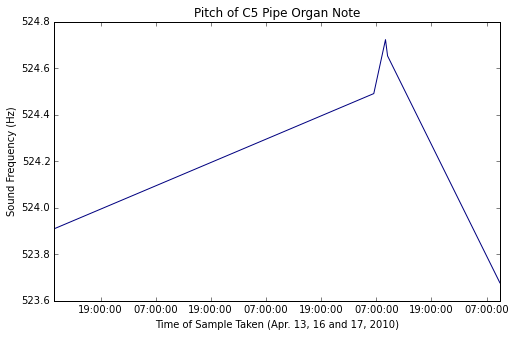

In [88]:
#def make_plot(data):
plt.figure(figsize=(8,5))

fig = plt.plot(organized_pitch['time'], organized_pitch['median_freq'], color = 'navy')

plt.title('Pitch of C5 Pipe Organ Note')
plt.ylabel('Sound Frequency (Hz)')
plt.xlabel('Time of Sample Taken (Apr. 13, 16 and 17, 2010)')
    
plt.savefig('../Figures/fig1.pdf')    
    #return()


In [ ]:
#We can see that pitch changes from ~ 523.9-524.7 Hz

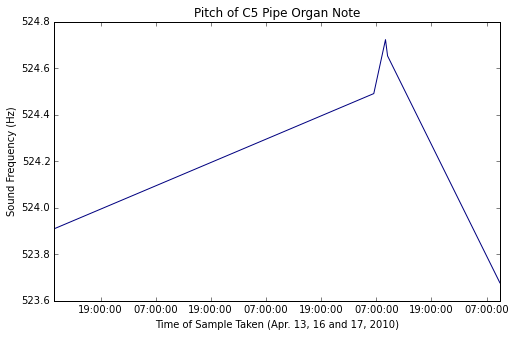

In [53]:
def make_plot(data):
    plt.figure(figsize=(8,5))

    fig = plt.plot(organized_pitch['time'], organized_pitch['median_freq'], color = 'navy')

    plt.title('Pitch of C5 Pipe Organ Note')
    plt.ylabel('Sound Frequency (Hz)')
    plt.xlabel('Time of Sample Taken (Apr. 13, 16 and 17, 2010)')
    plt.show()
    return(fig)

make_plot(organized_pitch)